In [1]:
import phase_plots as helper # Helper function for this notebook
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('ggplot')

# Dynamical Systems Explorer
### For Olivia by Ben

## 1. Dynamical Systems
Often, physical phenomena are modelled as coupled ordinary differential equations. These are often called $\textit{dynamical systems}$ but have many other names!
* The 'ordinary' means that they contain only first derivatives
* The 'coupled' means that the derivative of one variable might depend on the other variables
* All derivatives are allowed to depend on time
A 2D example is
$$\begin{align}
\frac{dx}{dt}&=2x \\
\frac{dy}{dt}&=x-y
\end{align}$$

The variables $x, y$ together are the $\textit{state}$ of the system, and the equations determine how the system $\textit{evolves}$ over time.

### 1.1 Phase Portraits
How can we visualise what happens in this system, without directly solving it? The first tool is the $\textit{phase portrait}$. Let's suppose we're at the coordinates $(x,y)=(1,0)$. Plugging these values into the evolution equations gives
$$\begin{align}
\left.\frac{dx}{dt}\right|_{(1,0)}&=2 \\
\left.\frac{dy}{dt}\right|_{(1,0)}&=1
\end{align}$$
Meaning that, in the next tiny time step, both $x$ and $y$ will increase, and moreover $x$ will increase twice as fast. We can draw this as a little vector arrow on the plane. If we do this for many points in the plane, we get a phase portrait. This allows us to qualitatively examine how the system evolves.

<Axes: >

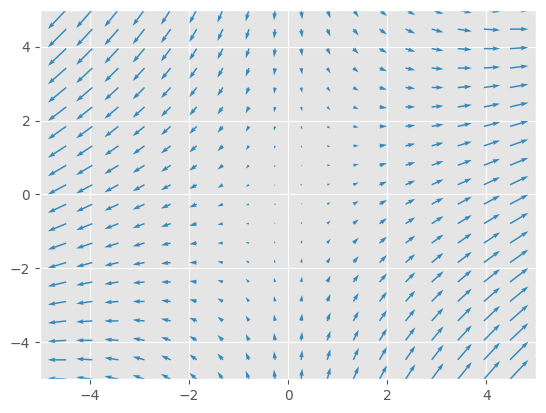

In [2]:
def system1(t, z):
    # Note: we pack the x, y coordinates together into a single vector z
    x, y = z
    return [2*x, x - y]

helper.plot_phase_portrait(system1)

### 1.2 Trajectories
The trajectories the system will take from a given starting point will 'follow' the arrows. This makes the phase portrait very powerful, since it gives you the qualitative behaviour of the system. but doesn't require you to actually solve the equations!

Examples of stuff that's visible from this phase portrait:
* Trajectories will either fly off towards $x=-\infty$ or $x=+\infty$, depending on the starting value of $x$ (unless $x=0$!)
* There appears to be a fixed point at $(0,0)$. If the system starts there, it stays there
* There appears to be adiagonal 'axis' bottom left to top right that the trajectories limit towards

Some information is harder to extract from the phase portrait. The main example is the speed of the trajectories. Bigger vector arrows mean faster trajectories, but that's all we get.

Let's plot some trajectories for this system:

<Axes: >

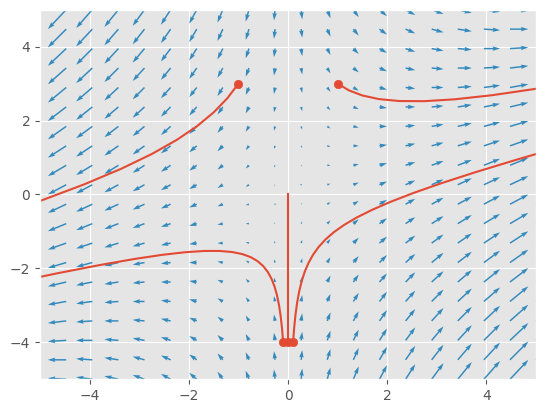

In [3]:
t_max = 10
z_0s = [[-0.1, -4], [0, -4], [0.1, -4], [-1, 3], [1, 3]]
helper.plot_phase_portrait(system1, t_max, z_0s)

### 1.3 Extra: more phase portraits
Let's have some fun plotting more phase portraits!

#### 1.3.1 Limit Cycle
The system
$$\begin{align}
\frac{dx}{dt}&=-y + x(1 - x^2 - y^2) \\
\frac{dy}{dt}&=x + y(1 - x^2 - y^2)
\end{align}$$

has a fixed point at $(0,0)$ but also a whole fixed $\textit{circle}$ $x^2+y^2=1$! Trajectories approach this circle, called a $\textit{limit cycle}$.

<Axes: >

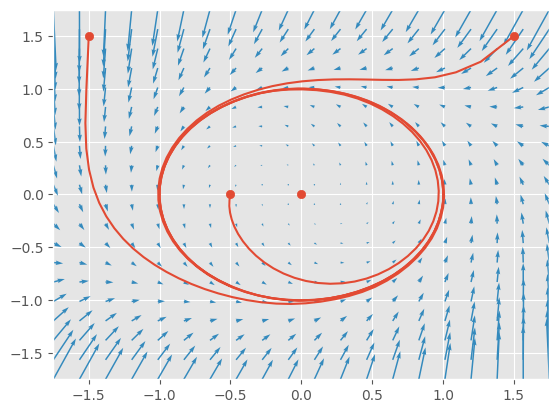

In [4]:
def limit_cycle_system(t, z):
    x, y = z
    return [-y + x*(1 - x**2 - y**2)/4, x + y*(1 - x**2 - y**2)]

t_max = 10
z_0s = [[0, 0], [-0.5, 0], [-1.5, 1.5], [1.5, 1.5]]
xrange, yrange = [-1.75, 1.75], [-1.75, 1.75]
helper.plot_phase_portrait(limit_cycle_system, t_max, z_0s, xrange, yrange)

This kind of dynamics is often seen in predator-prey relationships (although never this clean of course)

#### 1.3.2 Funky
This sytem is funky:
$$\begin{align}
\frac{dx}{dt}&=\frac12-xy \\
\frac{dy}{dt}&=x+y
\end{align}$$

<Axes: >

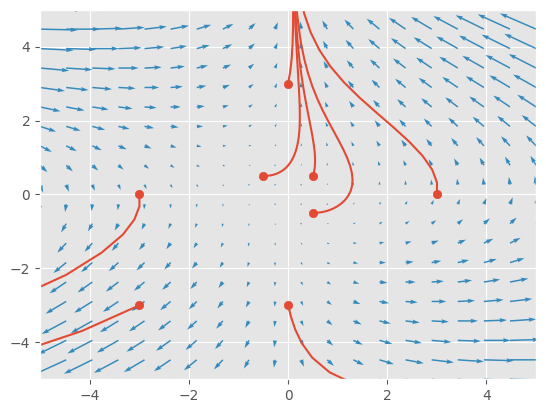

In [5]:
def dumb_system(t, z):
    x, y = z
    return [0.5 - x*y, y + x]

t_max = 10
z_0s = [[0.5, 0.5], [-0.5, 0.5], [0.5, -0.5], [-3, -3], [3, 0], [0, 3], [-3, 0], [0, -3]]
helper.plot_phase_portrait(dumb_system, t_max, z_0s)

### 1.4 Fixed points
I mentioned 'fixed point' earlier. Formally, a fixed point is a point where all the derivatives are zero, i.e. the trajectory is constant. Why are these important? Because they encode the $\textit{long-run}$ behaviour of the system! You can show that any trajectory either:
* Flies off to infinity in some direction
* Eventually falls into a fixed point (or a fixed orbit of some sort, like in the limit cycle example above)
* Is chaotic (which I won't describe in detail)

Fixed points are easy to find which is convenient. Finding out what type they are (a single point, an orbit, repelling, attracting, etc) is a little harder. We'll do this in section ??

### 1.5 Basic SIR model example
A simple SIR model has dynamics determined by the following equations:
$$\begin{align}
\frac{dS}{dt}&=-\beta IS -\mu S + \mu N\\
\frac{dI}{dt}&=\beta IS-\nu I-\mu I\\
\frac{dR}{dt}&=\nu I-\mu R
\end{align}$$
where $\beta$, $\nu$, and $\mu$ are real positive parameters, the infection rate, recovery (or death!) rate, and replacement rate respectively. Moreover, we have the constraint that the initial values sum to the total population $N=S_0+I_0+R_0$.

This system seems 3D since we have 3 populations $S$, $I$, $R$ but the constraint that $S+I+R=N$ means we only have two degrees of freedom. These systems are usually described in terms of the susceptible and infected populations.

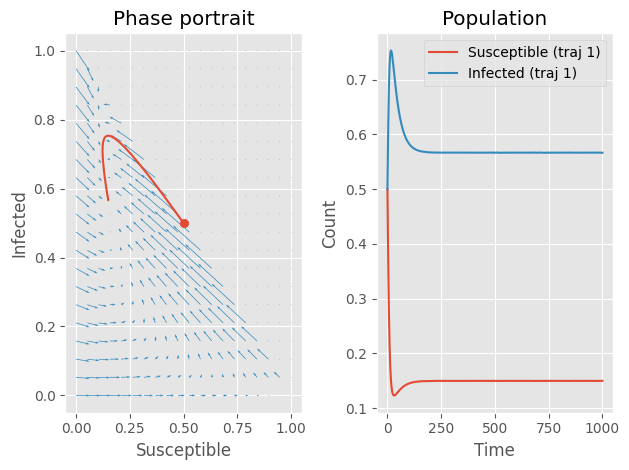

In [9]:
t_max = 10**3
z_0s = [[0.5, 0.5]]
helper.plot_SIR(0.2, 0.01, 0.02, t_max, z_0s)

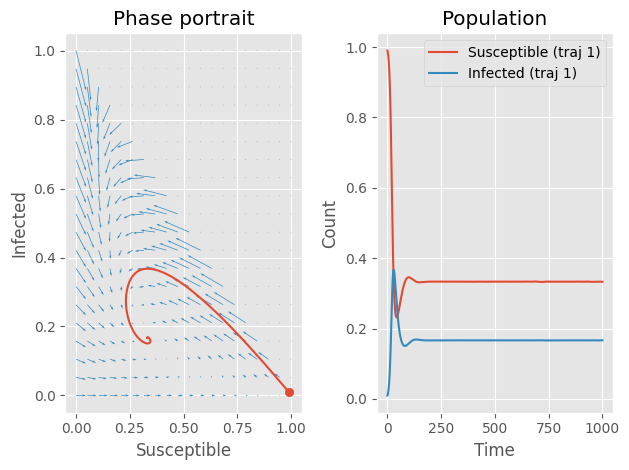

In [20]:
t_max = 10**3
z_0s = [[0.99, 0.01]]
helper.plot_SIR(0.3, 0.075, 0.025, t_max, z_0s)

These models are simple, but we immediately get useful info from them. There are two fixed points:
$$\begin{align}(S,I)&=(1,0)\\
(S,I)&=\left(\frac{\mu+\nu}{\beta},\frac\mu{\mu+\nu}-\frac\mu\beta\right)
\end{align}$$

The second of which might not exist. If the second one does exist inside the triangle, we can show that all trajectories with initial infected population $I_0>0$ will spiral into it.

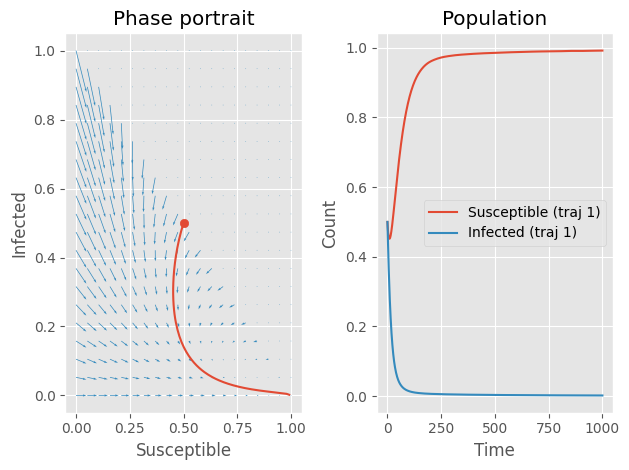

In [24]:
t_max = 10**3
z_0s = [[0.5, 0.5]]
helper.plot_SIR(0.1, 0.075, 0.025, t_max, z_0s)

## 2. Linear Stability Analysis
How can we figure out the behaviour of a system near a fixed point? Will it be an attracting or repelling fixed point or something else?). The answer is linear stability analysis. This is a fancy way of saying 'plug in $x^*+\epsilon$ where $x^*$ is the fixed point and Taylor expand'. Let's see how this is done in practice in 1D.

Our system is
$$\frac{dx}{dt}=f(x)$$

for some function $f(x)$ of $x$. Let's suppose there is a fixed point at $x=x^*$, meaning $f(x^*)=0$. Let's look at a point $x=x^*+\epsilon$ where $\epsilon$ is a tiny tiny perturbation. If we Taylor expand $f$, we get:
$$f(x^*+\epsilon)=f(x^*)+f'(x^*)\epsilon+\frac12f''(x^*)\epsilon^2+...$$

$f(x^*)=0$ since it's a fixed point. Also, since $\epsilon$ is a tiny tiny constant, we ignore all terms containing an $\epsilon^2$ or higher power:
$$f(x^*+\epsilon)\approx f'(x^*)\epsilon$$

So we get a $\textit{linear approximation}$ to the system near the fixed point
$$\frac{d\epsilon}{dt}\approx f'(x^*)\epsilon$$

The key point is that, $\textit{very near the fixed point }x^*$, the system $\frac{dx}{dt}=f(x)$ should behave almost identically to the system $\frac{d\epsilon}{dt}=f'(x^*)\epsilon$

### 2.1 Example
Let's plot the dynamics of the system
$$\frac{dx}{dt}=x-x^2$$

and its linear approximation near the fixed point $x^*=1$, which is given by
$$\frac{d\epsilon}{dt}=-\epsilon$$

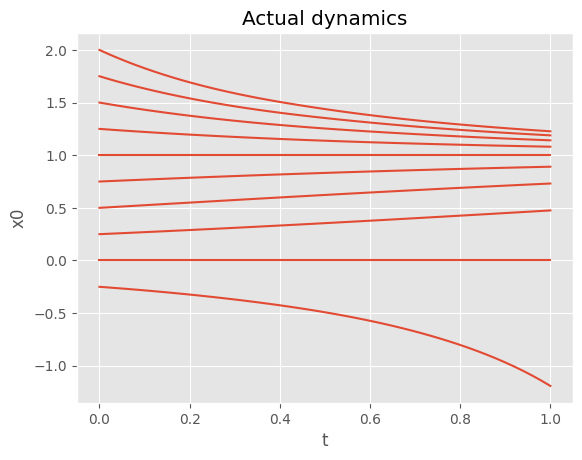

In [69]:
# Plot in phase space or configuration space?

from scipy.integrate import solve_ivp

fig, ax = plt.subplots(1, 1)
def true_system(t, x):
    return x - x**2

t_max = 1
ts = np.linspace(0, t_max)
for x in np.linspace(-0.25, 2, 10):
    sol = solve_ivp(true_system, t_span=[0, t_max], y0=[x], dense_output=True)
    ax.plot(ts, sol.sol(ts)[0], color="#E24A33")
ax.set_xlabel("t")
ax.set_ylabel("x0")
ax.set_title("Actual dynamics")
plt.show()

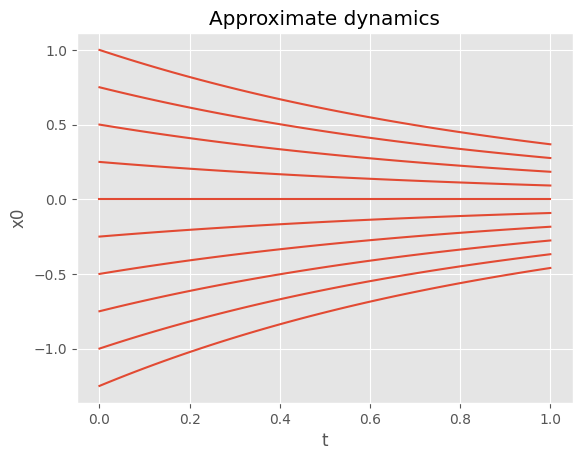

In [70]:
fig, ax = plt.subplots(1, 1)
def approx_system(t, x):
    return -x

for x in np.linspace(-1.25, 1, 10):
    sol = solve_ivp(approx_system, t_span=[0, t_max], y0=[x], dense_output=True)
    ax.plot(ts, sol.sol(ts)[0], color="#E24A33")
ax.set_xlabel("t")
ax.set_ylabel("x0")
ax.set_title("Approximate dynamics")
plt.show()

The dynamics of the approximate system for $\epsilon$ small (e.g. $\epsilon$ between $-0.25$ and $0.25$) match the dynamics of the actual system near the fixed point (e.g. $x$ between $0.75$ and $1.25$). The dynamics start to really differ near the other fixed point $x^*=0$.

Overlaying the two systems near the fixed point:

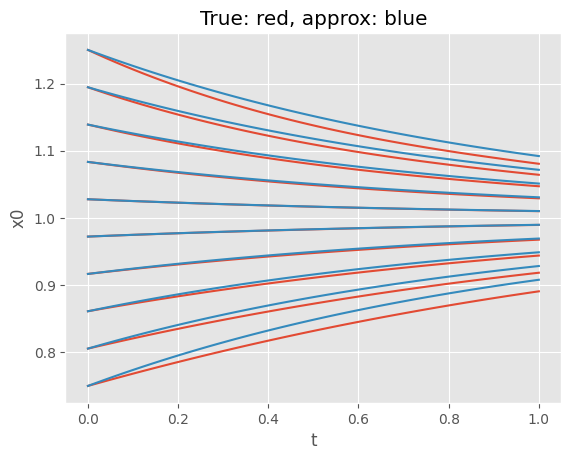

In [74]:
fig, ax = plt.subplots(1, 1)

for x in np.linspace(0.75, 1.25, 10):
    true_sol = solve_ivp(true_system, t_span=[0, t_max], y0=[x], dense_output=True)
    ax.plot(ts, true_sol.sol(ts)[0], color="#E24A33")
    approx_sol = solve_ivp(approx_system, t_span=[0, t_max], y0=[x - 1], dense_output=True)
    ax.plot(ts, approx_sol.sol(ts)[0] + 1, color="#348ABD")
ax.set_xlabel("t")
ax.set_ylabel("x0")
ax.set_title("True: red, approx: blue")
plt.show()

### 2.2 The 2D Case
In 2D, the idea is the same. Our 2D system looks like
$$\begin{align}
\frac{dx}{dt}&=f(x,y)\\
\frac{dy}{dt}&=g(x,y)
\end{align}$$

Near a fixed point $(x^*, y^*)$, we apply a small perturbation: $x=x^*=\epsilon$, $y=y^*=\eta$. We then Taylor expand (2D Taylor expansion is similar to 1D, but we'll save the details). Doing the algebra we end up with
$$\begin{align}
\frac{d\epsilon}{dt}&=\left.\frac{\partial f}{\partial x}\right|_{(x,y)=(x^*,y^*)}\epsilon+\left.\frac{\partial f}{\partial y}\right|_{(x,y)=(x^*,y^*)}\eta\\
\frac{d\eta}{dt}&=\left.\frac{\partial g}{\partial x}\right|_{(x,y)=(x^*,y^*)}\epsilon + \left.\frac{\partial g}{\partial y}\right|_{(x,y)=(x^*,y^*)}\eta
\end{align}$$

### 2.3 2D Example (WIP)
